In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflowjs as tfjs
print(tf.__version__)
print(pd.__version__)

2.9.0
1.5.3


In [2]:
df = pd.read_csv('fertilizer_amount_dataset.csv')
df


,P,hujan,curahhujan,jenistanaman,teksturtanah,area,pupuk
0,56,71.075622,Sangat Ringan,jagung,Lempung,17800,251
1,36,73.336361,Ringan,jagung,Lempung,19500,227
2,43,99.579812,Ringan,jagung,Lempung Berpasir,28300,566
3,44,102.266244,Ringan,jagung,Lempung Berpasir,14400,307
4,47,104.162615,Ringan,jagung,Lempung Berpasir,25700,580
...,...,...,...,...,...,...,...
895,34,177.774507,Ringan,kopi,Lempung Berpasir,17600,1117
896,15,127.924610,Ringan,kopi,Lempung Berpasir,12000,641
897,33,173.322839,Ringan,kopi,Lempung,16000,726
898,32,127.175293,Ringan,kopi,Lempung,15300,678


In [3]:
df['jenistanaman'] = df['jenistanaman'].astype('category')
df['jenistanaman'] = df['jenistanaman'].cat.codes
df['teksturtanah'] = df['teksturtanah'].astype('category')
df['teksturtanah'] = df['teksturtanah'].cat.codes
df['curahhujan'] = df['curahhujan'].astype('category')
df['curahhujan'] = df['curahhujan'].cat.codes
df


,P,hujan,curahhujan,jenistanaman,teksturtanah,area,pupuk
0,56,71.075622,1,1,0,17800,251
1,36,73.336361,0,1,0,19500,227
2,43,99.579812,0,1,1,28300,566
3,44,102.266244,0,1,1,14400,307
4,47,104.162615,0,1,1,25700,580
...,...,...,...,...,...,...,...
895,34,177.774507,0,5,1,17600,1117
896,15,127.924610,0,5,1,12000,641
897,33,173.322839,0,5,0,16000,726
898,32,127.175293,0,5,0,15300,678


In [4]:

# # convert categorical 'jenistanaman' data into one-hot data
# jenistanaman = df.pop('jenistanaman')
# df['Padi'] = (jenistanaman == 7)*1
# df['Jagung'] = (jenistanaman == 1)*1
# df['Kacang Merah'] = (jenistanaman == 4)*1
# df['Kacang Hijau'] = (jenistanaman == 3)*1
# df['Semangka'] = (jenistanaman == 8)*1
# df['Melon'] = (jenistanaman == 6)*1
# df['Apel'] = (jenistanaman == 0)*1
# df['Jeruk'] = (jenistanaman == 2)*1
# df['Kopi'] = (jenistanaman == 5)*1

# # convert categorical 'teksturtanah' data into one-hot data
# tt = df.pop('teksturtanah')
# df['Lempung'] = (tt == 0)*1
# df['Lempung Berpasir'] = (tt == 1)*1
# df['Pasir Berlempung'] = (tt == 3)*1
# df['Liat Berpasir'] = (tt == 2)*1

# column_to_move = df.pop("pupuk")

# # insert column with insert(location, column_name, column_value)

# df.insert(0, "pupuk", column_to_move)
# df



In [5]:
column_to_move = df.pop("pupuk")
df.insert(0, "pupuk", column_to_move)
df = df.drop(columns=(['curahhujan','hujan','P']))
dataset = df.values
df

,pupuk,jenistanaman,teksturtanah,area
0,251,1,0,17800
1,227,1,0,19500
2,566,1,1,28300
3,307,1,1,14400
4,580,1,1,25700
...,...,...,...,...
895,1117,5,1,17600
896,641,5,1,12000
897,726,5,0,16000
898,678,5,0,15300


In [6]:
X = dataset[:, 1:]
y = dataset[:, 0:1]
X

array([[    1,     0, 17800],
       [    1,     0, 19500],
       [    1,     1, 28300],
       ...,
       [    5,     0, 16000],
       [    5,     0, 15300],
       [    5,     0, 10100]], dtype=int64)

In [7]:
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np

# Normalization
normalizer = preprocessing.Normalization()

# adapt to the data
normalizer.adapt(np.array(X))
print(normalizer.mean.numpy())

[[4.0000000e+00 9.9111116e-01 1.9465443e+04]]


In [8]:

def build_model():
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=[3]),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mse', 'mae'])
    
    return model


In [9]:
model = build_model()
#!pip install git+https://github.com/tensorflow/docs


In [10]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

In [16]:
EPOCHS = 4000
history = model.fit(X, y, epochs=EPOCHS, verbose = 0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:214760.0781,  mae:382.3015,  mse:214760.0781,  
....................................................................................................
Epoch: 100, loss:211961.7031,  mae:379.9056,  mse:211961.7031,  
....................................................................................................
Epoch: 200, loss:218884.7188,  mae:377.5870,  mse:218884.7188,  
....................................................................................................
Epoch: 300, loss:222656.7344,  mae:382.8381,  mse:222656.7344,  
....................................................................................................
Epoch: 400, loss:203619.3594,  mae:369.0584,  mse:203619.3594,  
....................................................................................................
Epoch: 500, loss:205443.5938,  mae:367.2218,  mse:205443.5938,  
....................................................................................................
Epoch

In [19]:
from sklearn.metrics import r2_score
r2_score(y, test_predictions)

0.46022078545504796

29/29 [==============================] - 0s 2ms/step


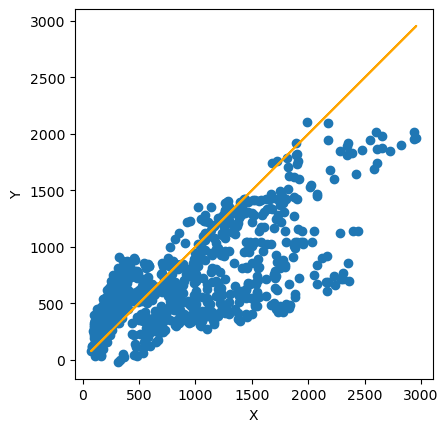

In [20]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y, test_predictions)
plt.xlabel('X')
plt.ylabel('Y')
_=plt.plot(y,y,color='orange')

In [21]:
df

,pupuk,jenistanaman,teksturtanah,area
0,251,1,0,17800
1,227,1,0,19500
2,566,1,1,28300
3,307,1,1,14400
4,580,1,1,25700
...,...,...,...,...
895,1117,5,1,17600
896,641,5,1,12000
897,726,5,0,16000
898,678,5,0,15300


In [23]:
import numpy as np

# 	641	5	1	12000
# 	726	5	0	16000

model.predict(np.array([[5,1,12000],[5,0,16000]]))
#df

1/1 [==============================] - 0s 97ms/step


array([[430.31677],
       [264.14243]], dtype=float32)

In [24]:
model.save('model1.h5')

In [25]:
tf.keras.models.load_model('model1.h5')



In [27]:
#Export the saved model
import pathlib
import tflite as tflite

export_dir = 'fortflite_1/'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: fortflite_1/assets


In [28]:
#Convert the model

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()


In [29]:
#Save the model

tflite_model_file = pathlib.Path('mlmodel_1.tflite')
tflite_model_file.write_bytes(tflite_model)

171184

In [30]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path='mlmodel_1.tflite')
interpreter.allocate_tensors()

In [31]:
input_details = interpreter.get_input_details()
input_shape = input_details[0]['shape']
input_data_type = input_details[0]['dtype']
input_shape


array([1, 3])